### Problem Description

Write some details about the problem

## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [4]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
... ## Write your code here
df.dropna(inplace=True)



In [6]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

<AxesSubplot:title={'center':'Which Countries made the most transactions?'}>

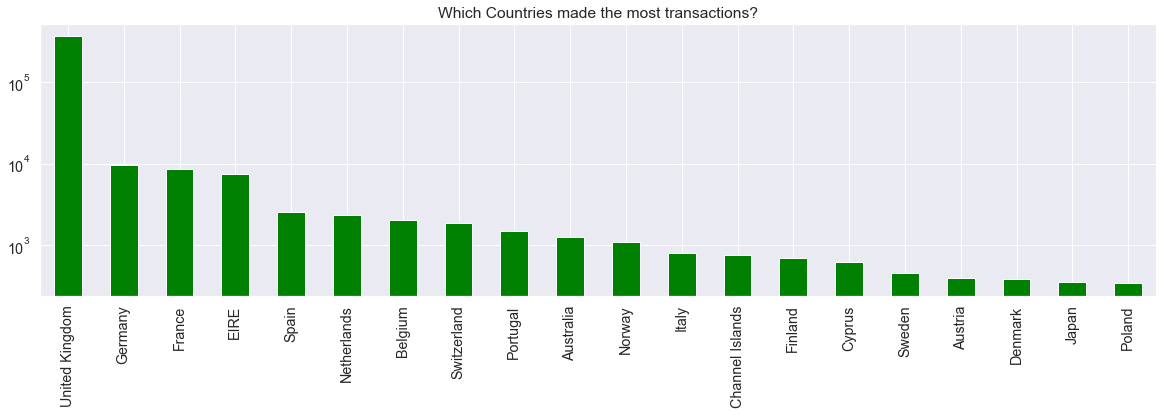

In [7]:
country=df['Country'].value_counts()[:20]
plt.yscale('log')
country.plot(kind='bar',color="green",title='Which Countries made the most transactions?',figsize=(20,5))

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [8]:
df["Revenue"]=df["Quantity"]*df["UnitPrice"]
df_top_10 = {'CustomerID':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].index,
            'Revenue':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].values}
df_top_10 = pd.DataFrame(df_top_10)
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [9]:
Frequency = df['Country'].groupby(df['CustomerID']).count().reset_index()
Frequency.columns = ['CustomerID', 'Frequency']
df_top_cust = Frequency.sort_values('Frequency', ascending=False).head(5).reset_index()
df_top_cust.drop('index', axis = 1, inplace = True)
df_top_cust

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [10]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

Ellipsis

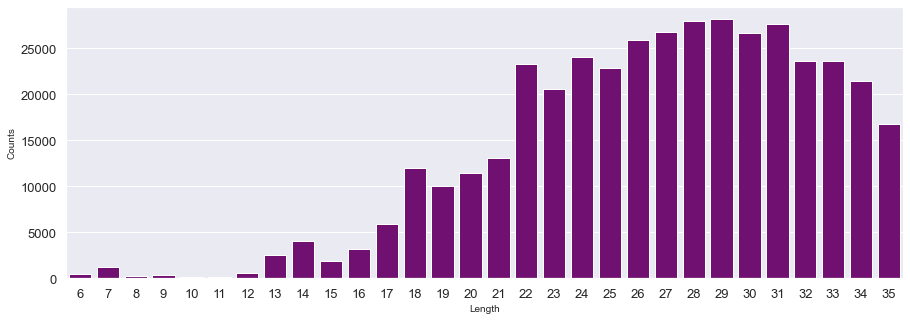

In [12]:
X=df['Description'].str.len().value_counts().index
Y=df['Description'].str.len().value_counts().values
plt.figure(figsize=(15,5))
sns.barplot(x=X,y=Y,palette=['purple'])
plt.xlabel("Length",size=10)
plt.xticks(size=13);
plt.ylabel("Counts",size=10)
plt.yticks(size=13);

... #Write your Code here

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [13]:
import datetime
df["Year"] = df.InvoiceDate.dt.year

df["Quarter"] =df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] =df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] =df.InvoiceDate.dt.dayofyear
df["Date"] =df.InvoiceDate.dt.date

<ipython-input-13-9adf837e02c7>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.InvoiceDate.dt.week


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [15]:
 grouped_features =['Date', 'Year', 'Quarter', 'Month', 'Week', 'Weekday','Dayofyear','Day','StockCode']

In [16]:
Aggregated=pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),columns=["Quantity"])
Aggregated["Revenue"]=df.groupby(grouped_features).Revenue.sum()
Aggregated=Aggregated.reset_index()
Aggregated.head(5)


,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook